In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
df=pd.read_csv('spam.csv')

In [27]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [29]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [30]:
spam_words=''.join(list(df[df['Category']=='spam']['Message']))

In [31]:
spam_words[:100]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr'

In [32]:
## Generate a word cloud from the spam messages
spam_wc=WordCloud(width=512,height=512).generate(spam_words)

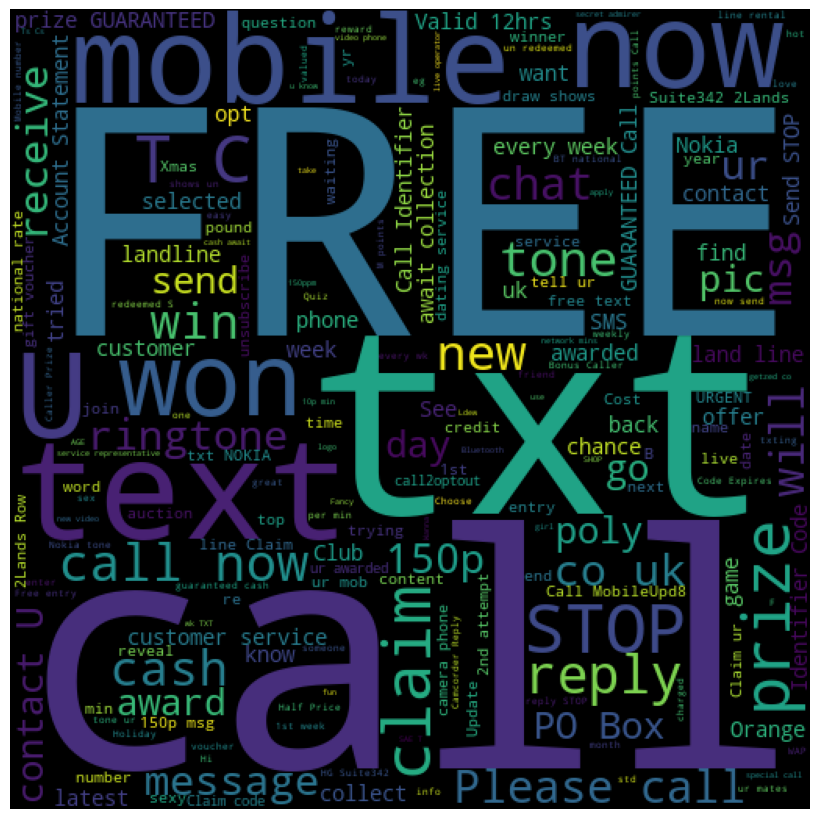

In [33]:
# Set up the plot with specified figure size and background color
plt.figure(figsize = (10, 8), facecolor = 'w')
# Display the word cloud image
plt.imshow(spam_wc)
# Remove axis for visual clarity
plt.axis('off')
# Adjust layout and show the plot
plt.tight_layout(pad = 0)
plt.show()

In [34]:
def clean_text(text):
    text=re.sub(r'\W','',text)
    text=text.lower()
    ext = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    return text

In [35]:
df['Message']=df['Message'].apply(clean_text)


In [36]:
df['Message']

0       gountiljurongpointcrazyavailableonlyinbugisngr...
1                                      oklarjokingwifuoni
2       freeentryin2awklycomptowinfacupfinaltkts21stma...
3                       udunsaysoearlyhorucalreadythensay
4         nahidontthinkhegoestousfhelivesaroundherethough
                              ...                        
5567    thisisthe2ndtimewehavetried2contactuuhavewonth...
5568                         willübgoingtoesplanadefrhome
5569            pitywasinmoodforthatsoanyothersuggestions
5570    theguydidsomebitchingbutiactedlikeidbeinterest...
5571                                 roflitstruetoitsname
Name: Message, Length: 5572, dtype: object

In [37]:
df['Category']=df['Category'].map({'ham':0,'spamm':1})

In [38]:
df['Category']

0       0.0
1       0.0
2       NaN
3       0.0
4       0.0
       ... 
5567    NaN
5568    0.0
5569    0.0
5570    0.0
5571    0.0
Name: Category, Length: 5572, dtype: float64

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Message']).toarray()

In [40]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [46]:
X = df.drop('Category', axis=1)  # Features
y = df['Category']               # Target


In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [48]:
# Extract labels into a separate array
y = df['Category'].values

In [43]:
y

array([ 0.,  0., nan, ...,  0.,  0.,  0.])

In [136]:
# Initialize the model
model = Sequential()

# Add the first dense layer (hidden layer)
model.add(Dense(units=50, activation='relu', input_dim=len(tfidf_vectorizer.get_feature_names_out())))

# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))


C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
# Compiling the model with additional metrics for handling class imbalance
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [138]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [139]:
callback

In [140]:
# Training the model with callbacks
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2,
                    epochs=10, 
                    batch_size=64, 
                    callbacks=[callback])

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - auc_4: 0.0000e+00 - loss: nan - precision_4: 1.0000 - recall_4: 0.0228 - val_accuracy: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: nan - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - auc_4: 0.0000e+00 - loss: nan - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: nan - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - auc_4: 0.0000e+00 - loss: nan - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: nan - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - auc_4: 0.0000e+00 - loss: nan - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0

In [168]:
# Predict on the test set and apply a threshold to get binary labels
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [183]:
print(np.any(np.isnan(y_test))) 

True


In [193]:
mask = ~np.isnan(y_test)
y_test_cleaned = y_test[mask]
y_pred_cleaned = y_pred[mask]

In [194]:
y_test

array([nan, nan, nan, ..., nan, nan, nan])

In [186]:
print(np.any(np.isnan(y_test)))  # Returns True if there are NaNs

True


In [187]:
# Remove NaN values from y_test and corresponding values from y_pred
y_test_clean = y_test[~np.isnan(y_test)]
y_pred_clean = y_pred[~np.isnan(y_test)]

In [188]:
# Replace NaN values with a default value (e.g., 0)
y_test_clean = np.nan_to_num(y_test, nan=0)

In [189]:
print(len(y_test_clean), len(y_pred_clean))


1115 0


In [190]:
mask = ~np.isnan(y_test)  # Create a mask where y_test is not NaN
y_test_clean = y_test[mask]  # Apply the mask to y_test
y_pred_clean = y_pred[mask]  # Apply the same mask to y_pred

In [214]:
print(conf_matrix)

[[978]]


In [8]:
 #Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Add a dense layer with a dynamic number of units and 'relu' activation
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=len(tfidf_vectorizer.get_feature_names_out())))
    # Add a dropout layer with a tunable dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    # Add the output layer with a sigmoid activation for binary classification
    model.add(Dense(units=1, activation='sigmoid'))
 
    # Compile the model with a tunable learning rate for the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', 
                                                               values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [50]:
def build_model(hp):
    # Define the input shape (for example, for MNIST images)
    input_shape = (28, 28, 1)  # Update based on your data shape

    # Initialize the model
    model = tf.keras.Sequential()
    
    # Add a Conv2D layer with hyperparameters
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('filters', min_value=32, max_value=256, step=32),
                                     kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Add a dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    
    # Output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Assuming a 10-class classification task

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)


C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [51]:
X_train

,Message
2594,tmrtiminstilldasamewatcosigotlessonuntil6
3451,yajusttellingabtthtincident
1538,allsoundsgoodfingersmakesitdifficulttotype
2530,canyoujustcomeinforasectheressomebodyhereiwant...
5364,call09095350301andsendourgirlsintoeroticecstac...
...,...
953,beautifultruthagainstgravityreadcarefullyourhe...
444,sorryillcalllater
4145,thatsashamemaybecldmeetforfewhrstomo
5234,okcoolseeyathen


In [53]:
# Define the early stopping callback
stop_early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Now use it in the tuner search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])


Trial 2 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |224               |filters
192               |128               |units
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round



C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\si

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\optree\ops.py", line 752, in tree_map
    return treespec.unflatten(map(func, *flat_args))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Invalid dtype: object


In [58]:
# Get all hyperparameters for the best trial
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all the hyperparameters to see the available keys
print(best_hps.values)

{'filters': 224, 'units': 128, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}


In [64]:
# Get the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all available hyperparameters
print(best_hps.values)

# Handle the case where learning_rate may not be available
try:
    learning_rate = best_hps['learning_rate']
except KeyError:
    learning_rate = 'Not found'

# Print the optimal hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps['units']} and the optimal learning rate for the optimizer is {learning_rate}.
""")


{'filters': 224, 'units': 128, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer is Not found.



In [65]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
 
# Rebuild the model with the best hyperparameters
best_model = build_model(best_hp)

C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [71]:
# Assuming 'df' is your full DataFrame and has already undergone necessary preprocessing steps
# Apply TF-IDF transformation to the 'Message' column
X_full = tfidf_vectorizer.transform(df['Message']).toarray()  
y_full = df['Category'].values  # Assuming 'Category' column contains the labels

In [72]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(5000,)),  # Input layer expecting a 5000-dimensional vector
    layers.Dense(128, activation='relu'),  # Dense layer for further learning
    layers.Dense(64, activation='relu'),  # Another dense layer
    layers.Dense(10, activation='softmax')  # Output layer (for 10 classes, modify as needed)
])


In [76]:
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
df.dtypes

Category    float64
Message      object
dtype: object

In [85]:
# Assuming X_test and y_test are your test datasets
evaluation_results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation_results[0]}, Test Accuracy: {evaluation_results[1]}")

ValueError: Invalid dtype: object

In [86]:
print(X_test.dtypes)  # For pandas DataFrame, or check type with type(X_test) for arrays
print(y_test.dtypes)  # For pandas DataFrame, or check type with type(y_test) for arrays


Message    object
dtype: object
float64


In [89]:
print(X_test.isna().sum())  # For pandas DataFrame
print(y_test.isna().sum())  # For pandas DataFrame

Message    0
dtype: int64
137


In [91]:
evaluation_results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation_results[0]}, Test Accuracy: {evaluation_results[1]}")

ValueError: Invalid dtype: object

In [92]:
# Save the model in HDF5 format
best_model.save("text_classification_model.keras")